In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np

In [3]:
def degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, width=0.7)
    plt.show()

## Red aleatoria // Modelo Erdös-Rényi
- Nodos (N)
- Probabilidad (p)
- Enlaces (\<L> = p · Lmax)
- Grado medio (\<k> = p · (N-1))
- Clustering (C = \<k> / N)
- Distancia media (\<d> = logN / log \<k>) [Solo grafos conexos]

In [4]:
def estudio_red_ER(N_list, P_list):
    for N in N_list:
        for p in P_list:
            # Medidas
            k = []
            l = []
            d = []
            c = []
            Ncc = []
            total_deg = []

            # Generar 15 grafos
            for i in range(0,15):
                G = nx.gnp_random_graph(N, p)

                for n, deg in G.degree():
                    total_deg.append(deg)

                k.append(np.sum([deg for n, deg in nx.degree(G)]) / N)
                l.append(nx.number_of_edges(G))
                c.append(nx.average_clustering(G))
#                 try:
#                     d.append(nx.average_shortest_path_length(G)) # Solo con grafo conexo
#                 except:
#                     d_aux=[]
#                     for C in (G.subgraph(c).copy() for c in nx.connected_components(G)): d_aux.append(nx.average_shortest_path_length(C))
#                     d.append(np.max(d_aux))
                Ncc.append(nx.number_connected_components(G))
                    
            # Medidas teoricas / medidas calculadas
            print("Red Aleatoria / Modelo Erdos-Renyi (N = {}, p = {})".format(N, p))
            print("---------------------------------------------------")
            print("Medidas TEORICAS")
            print('<k>: ', p*(N-1))
            print('<L>: ', p*((N*(N-1)/2)))
            print('<C>: ', (p*(N-1)) / N)
#             print('<d>: ', np.log(N) / np.log(p*(N-1)) )
            print("-------------------------")
            print("Medidas REALES")
            print('<k>: ', np.mean(k))
            print('<L>: ', np.mean(l))
            print('<C>: ', np.mean(c))
#             print('<d>: ', np.mean(d))
            print('Ncc: ', np.round(np.mean(Ncc)))
            
            # Grafica distribucion de grado
            deg_cnt = collections.Counter(sorted(total_deg))
            deg, cnt = zip(*deg_cnt.items())
            cnt = tuple([x/15 for x in cnt])
            plt.bar(deg, cnt)
            plt.plot(deg, cnt, marker='o', color='red', alpha=0.5)

            plt.title("Distribucion de grado")
            plt.ylabel("Nº nodos")
            plt.xlabel("Grado")
            plt.show()
            

Redes aleatorias de 500 nodos

Red Aleatoria / Modelo Erdos-Renyi (N = 500, p = 0.0015)
---------------------------------------------------
Medidas TEORICAS
<k>:  0.7485
<L>:  187.125
<C>:  0.001497
-------------------------
Medidas REALES
<k>:  0.7205333333333334
<L>:  180.13333333333333
<C>:  0.0004222222222222222
Ncc:  320.0


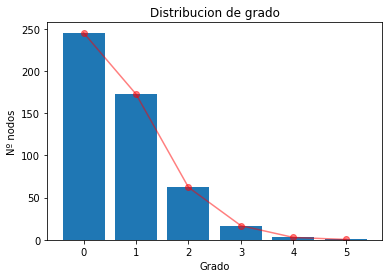

Red Aleatoria / Modelo Erdos-Renyi (N = 500, p = 0.002)
---------------------------------------------------
Medidas TEORICAS
<k>:  0.998
<L>:  249.5
<C>:  0.001996
-------------------------
Medidas REALES
<k>:  1.0224000000000002
<L>:  255.6
<C>:  0.00048000000000000007
Ncc:  245.0


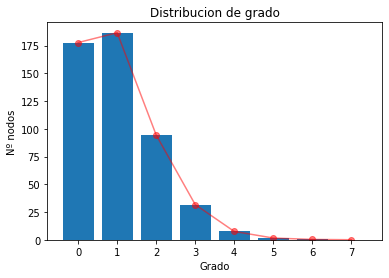

Red Aleatoria / Modelo Erdos-Renyi (N = 500, p = 0.005)
---------------------------------------------------
Medidas TEORICAS
<k>:  2.495
<L>:  623.75
<C>:  0.0049900000000000005
-------------------------
Medidas REALES
<k>:  2.5301333333333336
<L>:  632.5333333333333
<C>:  0.0029366137566137567
Ncc:  47.0


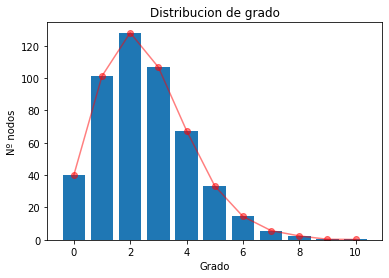

Red Aleatoria / Modelo Erdos-Renyi (N = 500, p = 0.014)
---------------------------------------------------
Medidas TEORICAS
<k>:  6.986
<L>:  1746.5
<C>:  0.013972
-------------------------
Medidas REALES
<k>:  6.9328
<L>:  1733.2
<C>:  0.014453582469588647
Ncc:  1.0


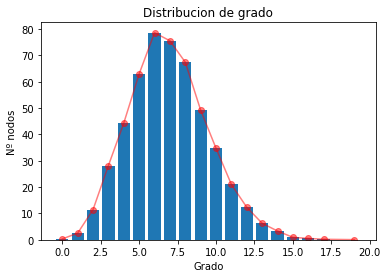

In [5]:
estudio_red_ER([500], [0.0015, 0.002, 0.005, 0.014])

Redes aleatorias de 5000 nodos

Red Aleatoria / Modelo Erdos-Renyi (N = 5000, p = 0.00015)
---------------------------------------------------
Medidas TEORICAS
<k>:  0.7498499999999999
<L>:  1874.6249999999998
<C>:  0.00014996999999999998
-------------------------
Medidas REALES
<k>:  0.7544533333333334
<L>:  1886.1333333333334
<C>:  0.0
Ncc:  3114.0


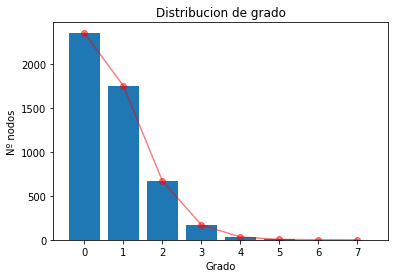

Red Aleatoria / Modelo Erdos-Renyi (N = 5000, p = 0.0002)
---------------------------------------------------
Medidas TEORICAS
<k>:  0.9998
<L>:  2499.5
<C>:  0.00019996
-------------------------
Medidas REALES
<k>:  1.0029066666666666
<L>:  2507.266666666667
<C>:  1.9999999999999998e-05
Ncc:  2494.0


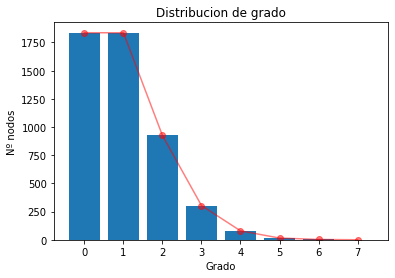

Red Aleatoria / Modelo Erdos-Renyi (N = 5000, p = 0.0005)
---------------------------------------------------
Medidas TEORICAS
<k>:  2.4995
<L>:  6248.75
<C>:  0.0004999
-------------------------
Medidas REALES
<k>:  2.505333333333333
<L>:  6263.333333333333
<C>:  0.0004028465608465609
Ncc:  464.0


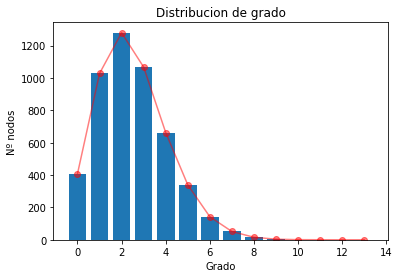

Red Aleatoria / Modelo Erdos-Renyi (N = 5000, p = 0.0018)
---------------------------------------------------
Medidas TEORICAS
<k>:  8.998199999999999
<L>:  22495.5
<C>:  0.0017996399999999997
-------------------------
Medidas REALES
<k>:  9.024053333333335
<L>:  22560.133333333335
<C>:  0.0017901061109562933
Ncc:  2.0


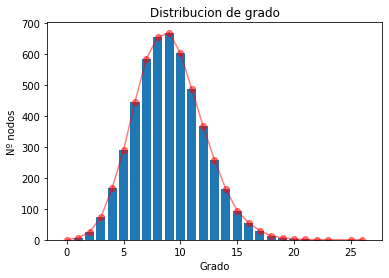

In [20]:
estudio_red_ER([5000], [0.00015, 0.0002, 0.0005, 0.0018])

### Ejemplos de redes en las distintas etapas:

#### Subrítica:

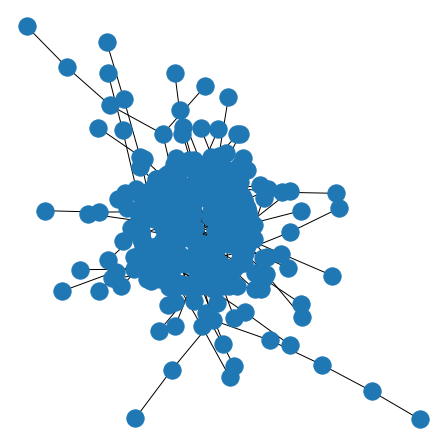

In [14]:

N = 500
p = 0.0015

red_ER_n500_subcritic = nx.gnp_random_graph(N, p)
plt.figure(figsize=(6,6))
nx.draw_kamada_kawai(red_ER_n500_subcritic)

#### Crítica:

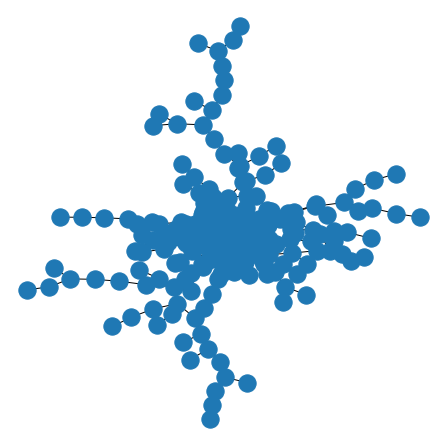

In [15]:
p = 0.002
red_ER_n500_critic = nx.gnp_random_graph(N, p)
plt.figure(figsize=(6,6))
nx.draw_kamada_kawai(red_ER_n500_critic)

####  supercrítica:

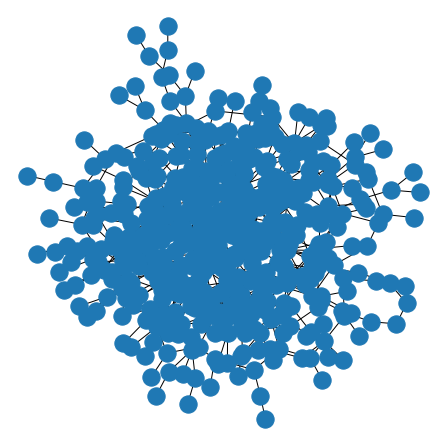

In [16]:
p = 0.005

red_ER_n500_supercritic = nx.gnp_random_graph(N, p)
plt.figure(figsize=(6,6))
nx.draw_kamada_kawai(red_ER_n500_supercritic)

####  Conectada:

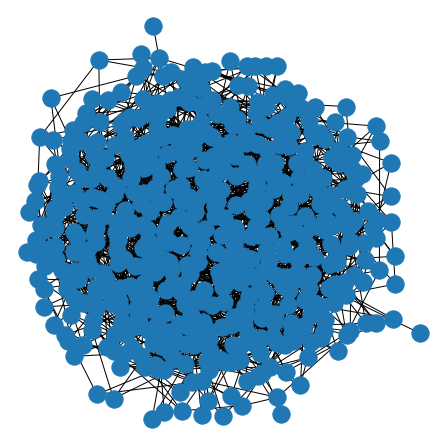

In [17]:
p = 0.014
red_ER_n500_connected = nx.gnp_random_graph(N, p)
plt.figure(figsize=(6,6))
nx.draw_kamada_kawai(red_ER_n500_connected)

## Red libre de escala // Modelo Barabási-Albert
- Nodos (N)   --> (t = N - m)
- Nodos iniciales (m0)
- Numero de conexiones de un nodo nuevo (m <= m0)
- Enlaces (\<L> = m0 + m·t)
- Grado medio (\<k> = 2 · m)
- Clustering (C = (ln N^2) / N)
- Distancia media (\<d> = ln(N) / ln(ln(N)) )

In [16]:
def estudio_red_BA(N_list, M_list):
    for N in N_list:
        for m in M_list:
            # Medidas
            k = []
            l = []
            d = []
            c = []
            Ncc = []
            total_deg = []

            # Generar 15 grafos
            for i in range(0,15):
                G = nx.barabasi_albert_graph(N, m)

                for n, deg in G.degree():
                    total_deg.append(deg)

                k.append(np.sum([deg for n, deg in nx.degree(G)]) / N)
                l.append(nx.number_of_edges(G))
                c.append(nx.average_clustering(G))
                d.append(nx.average_shortest_path_length(G))
                Ncc.append(nx.number_connected_components(G))

            # Medidas teoricas / medidas calculadas
            print("Red Aleatoria / Modelo Barabasi-Albert (N = {}, m = {})".format(N, m))
            print("-------------------------------------------------------")
            print("Medidas TEORICAS")
            print('<k>: ', 2*m)
            print('<L>: ', m + m*(N - m))
            print('<C>: ', (np.log(N)**2) / N)
            print('<d>: ', np.log(N) / np.log(np.log(N)))
            print("-------------------------")
            print("Medidas REALES")
            print('<k>: ', np.mean(k))
            print('<L>: ', np.mean(l))
            print('<C>: ', np.mean(c))
            print('<d>: ', np.mean(d))
            print('Ncc: ', np.round(np.mean(Ncc)))
            
            # Grafica distribucion de grado
            deg_cnt = collections.Counter(sorted(total_deg))
            deg, cnt = zip(*deg_cnt.items())
            cnt = tuple([x/15 for x in cnt])
            plt.figure(figsize=(7,5))
            plt.bar(deg, cnt, width=0.9)
            plt.plot(deg, cnt, marker='o', color='red', alpha=0.5)
            
            plt.title("Distribucion de grado")
            plt.ylabel("Nº nodos")
            plt.xlabel("Grado")
            plt.show()

Red Aleatoria / Modelo Barabasi-Albert (N = 500, m = 3)
-------------------------------------------------------
Medidas TEORICAS
<k>:  6
<L>:  1494
<C>:  0.07724270763394936
<d>:  3.401718228036341
-------------------------
Medidas REALES
<k>:  5.9639999999999995
<L>:  1491.0
<C>:  0.05087629258490914
<d>:  3.2405974615898456
Ncc:  1.0


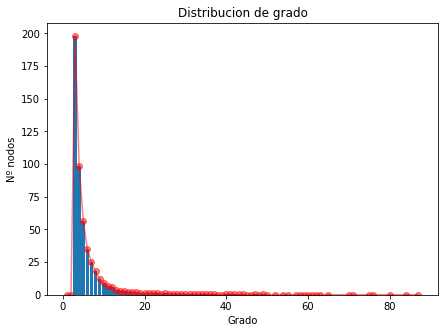

Red Aleatoria / Modelo Barabasi-Albert (N = 500, m = 4)
-------------------------------------------------------
Medidas TEORICAS
<k>:  8
<L>:  1988
<C>:  0.07724270763394936
<d>:  3.401718228036341
-------------------------
Medidas REALES
<k>:  7.9360000000000035
<L>:  1984.0
<C>:  0.05830046240522277
<d>:  2.94958663994656
Ncc:  1.0


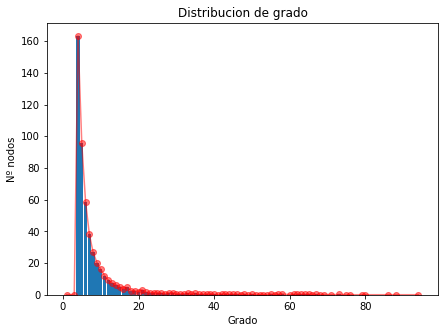

Red Aleatoria / Modelo Barabasi-Albert (N = 5000, m = 3)
-------------------------------------------------------
Medidas TEORICAS
<k>:  6
<L>:  14994
<C>:  0.014508515971981424
<d>:  3.976119453625683
-------------------------
Medidas REALES
<k>:  5.996399999999999
<L>:  14991.0
<C>:  0.008994752039619814
<d>:  4.055851986397278
Ncc:  1.0


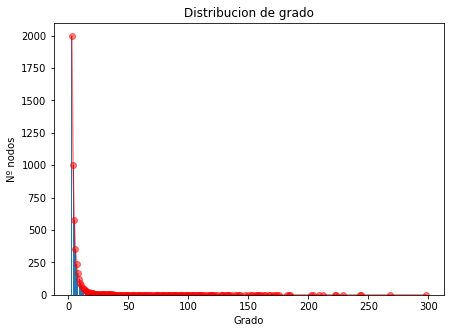

Red Aleatoria / Modelo Barabasi-Albert (N = 5000, m = 4)
-------------------------------------------------------
Medidas TEORICAS
<k>:  8
<L>:  19988
<C>:  0.014508515971981424
<d>:  3.976119453625683
-------------------------
Medidas REALES
<k>:  7.9936
<L>:  19984.0
<C>:  0.010493291814187079
<d>:  3.6933536040541437
Ncc:  1.0


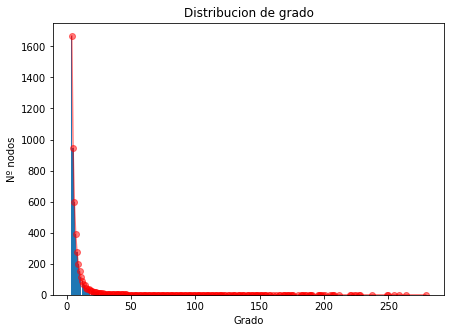

In [6]:
estudio_red_BA([500, 5000], [3, 4])

### Ejemplos Barabási-Albert:

#### m = 3

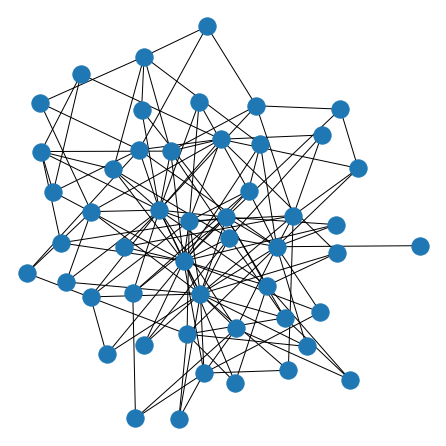

In [21]:
N = 50
m = 3
red_BA_n50_m3 = nx.barabasi_albert_graph(N, m)
plt.figure(figsize=(6,6))
nx.draw_kamada_kawai(red_BA_n50_m3)

#### m = 4

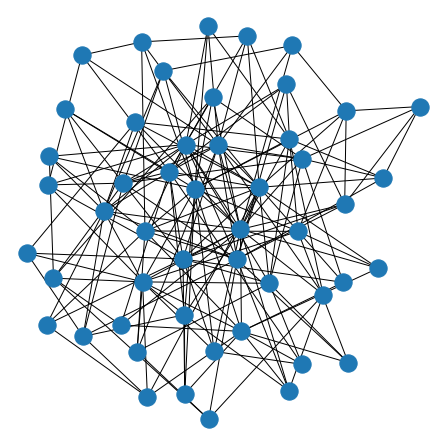

In [22]:
N = 50
m = 4
red_BA_n50_m4 = nx.barabasi_albert_graph(N, m)
plt.figure(figsize=(6,6))
nx.draw_kamada_kawai(red_BA_n50_m4)

# Estudio red Practica 1 (MARVEL)

Red Aleatoria / Modelo Barabasi-Albert (N = 6403, m = 21)
-------------------------------------------------------
Medidas TEORICAS
<k>:  42
<L>:  134043
<C>:  0.011997008324603327
-------------------------
Medidas REALES
<k>:  41.862252069342496
<L>:  134022.0
<C>:  0.02582020547521698
Ncc:  1.0


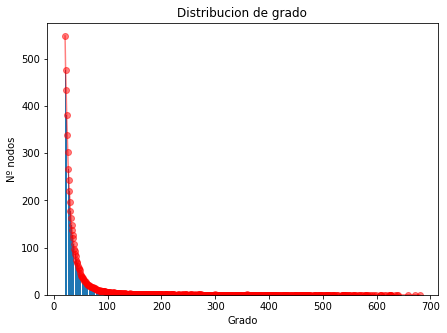

Red Aleatoria / Modelo Barabasi-Albert (N = 6403, m = 22)
-------------------------------------------------------
Medidas TEORICAS
<k>:  44
<L>:  140404
<C>:  0.011997008324603327
-------------------------
Medidas REALES
<k>:  43.84882086521942
<L>:  140382.0
<C>:  0.027030035555776755
Ncc:  1.0


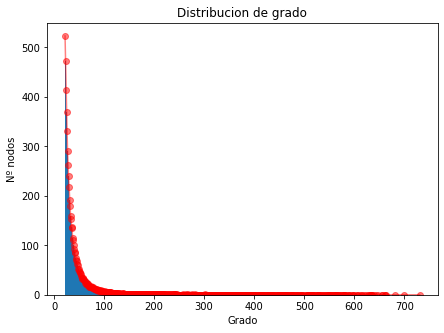

Red Aleatoria / Modelo Barabasi-Albert (N = 6403, m = 23)
-------------------------------------------------------
Medidas TEORICAS
<k>:  46
<L>:  146763
<C>:  0.011997008324603327
-------------------------
Medidas REALES
<k>:  45.83476495392783
<L>:  146740.0
<C>:  0.02776161118082548
Ncc:  1.0


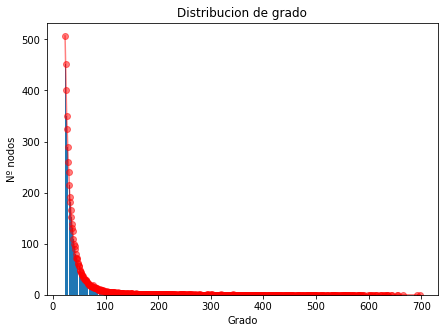

Red Aleatoria / Modelo Barabasi-Albert (N = 6403, m = 24)
-------------------------------------------------------
Medidas TEORICAS
<k>:  48
<L>:  153120
<C>:  0.011997008324603327
-------------------------
Medidas REALES
<k>:  47.82008433546775
<L>:  153096.0
<C>:  0.028378201447976734
Ncc:  1.0


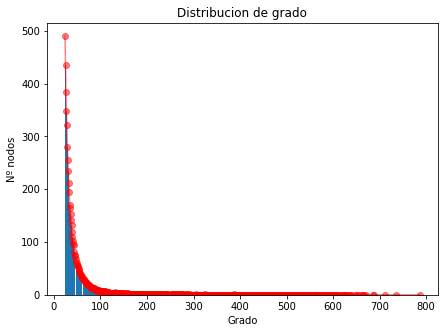

Red Aleatoria / Modelo Barabasi-Albert (N = 6403, m = 25)
-------------------------------------------------------
Medidas TEORICAS
<k>:  50
<L>:  159475
<C>:  0.011997008324603327
-------------------------
Medidas REALES
<k>:  49.80477900983915
<L>:  159450.0
<C>:  0.029262050528305786
Ncc:  1.0


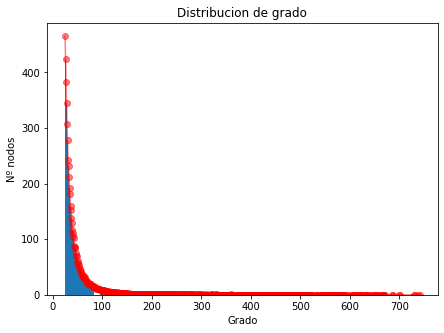

Red Aleatoria / Modelo Barabasi-Albert (N = 6403, m = 26)
-------------------------------------------------------
Medidas TEORICAS
<k>:  52
<L>:  165828
<C>:  0.011997008324603327
-------------------------
Medidas REALES
<k>:  51.78884897704201
<L>:  165802.0
<C>:  0.030202905453300642
Ncc:  1.0


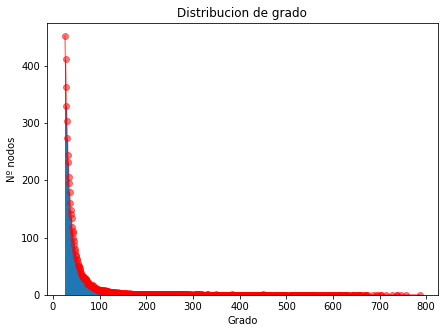

Red Aleatoria / Modelo Barabasi-Albert (N = 6403, m = 27)
-------------------------------------------------------
Medidas TEORICAS
<k>:  54
<L>:  172179
<C>:  0.011997008324603327
-------------------------
Medidas REALES
<k>:  53.77229423707637
<L>:  172152.0
<C>:  0.031011416370120035
Ncc:  1.0


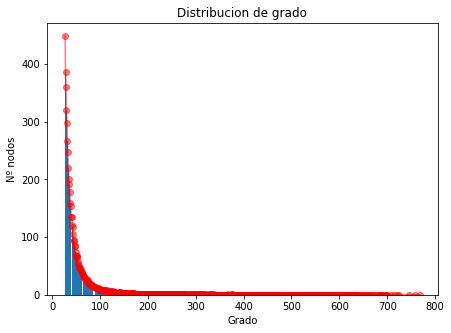

Red Aleatoria / Modelo Barabasi-Albert (N = 6403, m = 28)
-------------------------------------------------------
Medidas TEORICAS
<k>:  56
<L>:  178528
<C>:  0.011997008324603327
-------------------------
Medidas REALES
<k>:  55.755114789942226
<L>:  178500.0
<C>:  0.03183640822417861
Ncc:  1.0


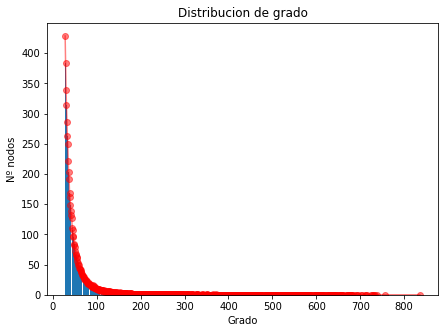

In [15]:
estudio_red_BA([6403], [21, 22, 23, 24, 25, 26, 27, 28])

**Mas similar a red P1 -> m = 26**

### Medidas de la red de marvel

Number of nodes: 6408

Number of edges: 167163

Average degree:  52.1732

Coef. global de clustering: 0.7744001182184556

Average Path length: 2.638390763311266

<img src="marvel_distribution.png" width="500" height="500">

Podemos ver en la distribución de grado que esta red se asemeja mucho al modelo de Barabási-Albert.
Aunque el modelo Erdös-Rényi tiene una grafica similar en su etapa de subcrítica apenas tiene valores y cuando sus nodos se conectan más, la gráfica tiende a una campana de Gauss en vez de a una funcion (1/x)

Aun asi tanto el numero de enlaces como el coeficiente de clustering son muy pequeños comparados con lo que deberian ser si siguiesen el patron marcado por la red de Marvel

Para encontrar una red mas similar, creamos un conjunto de redes con los mismos nodos que la red de la practica 1 y distintas m. Con eso hallamos que con m = 26 se crean redes mucho mas parecidas

Red Aleatoria / Modelo Barabasi-Albert (N = 6408, m = 26)
-------------------------------------------------------
Medidas TEORICAS
<k>:  52
<L>:  165958
<C>:  0.011989782727723988
<d>:  4.037819391379427
-------------------------
Medidas REALES
<k>:  51.78901373283396
<L>:  165932.0
<C>:  0.030172176447186217
<d>:  2.5423606398042717
Ncc:  1.0


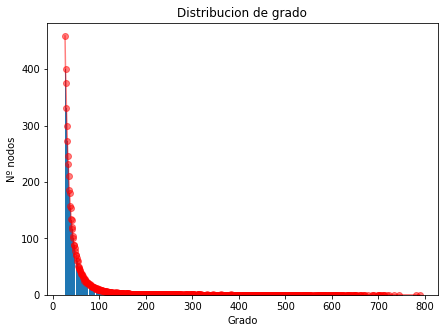

In [17]:
estudio_red_BA([6408], [26])